In [1]:
#import stuff
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from astropy.table import QTable
from mpl_toolkits.mplot3d import Axes3D
from sympy import Ellipse, Point, Rational
from scipy import stats
from scipy.stats import multivariate_normal
import seaborn as sns
import random
from sklearn.cluster import DBSCAN
from sklearn import metrics
from ruwetools import U0Interpolator

In [ ]:
data = pd.read_csv("/home/and/Data_science/Tesis/CSVs/Blanco1_full")
data_1 = pd.read_csv("/home/and/Data_science/Tesis/CSVs/Blanco1_full")

In [85]:
data = pd.read_csv("/home/and/Data_science/Tesis/CSVs/NGC2451_full")
data_1 = pd.read_csv("/home/and/Data_science/Tesis/CSVs/NGC2451_full")

In [123]:
data = pd.read_csv("/home/and/Data_science/Tesis/CSVs/Hyades_full")
data_1 = pd.read_csv("/home/and/Data_science/Tesis/CSVs/Hyades_full")

In [140]:
data = pd.read_csv("/home/and/Data_science/Tesis/CSVs/Perseus_full")
data_1 = pd.read_csv("/home/and/Data_science/Tesis/CSVs/Perseus_full")

In [2]:
data = pd.read_csv("/home/and/Data_science/Tesis/CSVs/Pleiades_full")
data_1 = pd.read_csv("/home/and/Data_science/Tesis/CSVs/Pleiades_full")

In [18]:
data = pd.read_csv("/home/and/Data_science/Tesis/CSVs/Beehive_full")
data_1 = pd.read_csv("/home/and/Data_science/Tesis/CSVs/Beehive_full")

In [19]:
len(data)

774810

In [20]:
data = data.dropna()
len(data)

770269

In [21]:
#arregalr paralajes
data = data.loc[data['parallax']>0]
data = data.loc[data['visibility_periods_used']>8]

In [22]:
len(data)

770269

In [23]:
data['abs(pmra_error/pmra)'] = np.abs(data['pmra_error']/data['pmra'])
data['abs(pmdec_error/pmdec)'] = np.abs(data['pmdec_error']/data['pmdec'])
data['abs(parallax_error/parallax)'] = np.abs(data['parallax_error']/data['parallax'])

In [24]:
len(data)

770269

In [25]:
data = data.loc[data['abs(pmra_error/pmra)']<0.10 ]
data = data.loc[data['abs(pmdec_error/pmdec)']<0.10 ]
data = data.loc[data['abs(parallax_error/parallax)']<0.10 ]
len(data)

139242

In [26]:
data = data.loc[data['rp']>6]

In [27]:
#Caculate  UWE

In [28]:
data['UWE']= np.sqrt(data['astrometric_chi2_al']/(data['astrometric_n_good_obs_al']-5))

In [29]:
rwi = U0Interpolator()
data['RUWE'] = data['UWE']/rwi.get_u0(data['g'], data['bp_rp'])

In [30]:
data = data.loc[data['RUWE']<1.4]

Total data: 774810
Reduced data: 132496
Reduced percentage: 17.10045043300938%
Total data: 774810
Reduced data: 132496
Reduced percentage: 17.10045043300938%


(-100.0, 100.0)

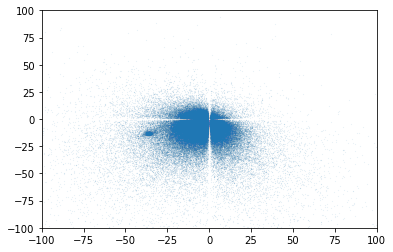

In [32]:
#for Beeehive
print("Total data: " +str(len(data_1)))
print("Reduced data: " +str(len(data)))
print("Reduced percentage: " +str(len(data)*100/(len(data_1))) +"%")

data = data.loc[data['pmra']<100]
data = data.loc[data['pmra']>-100]

data = data.loc[data['pmdec']<100]
data = data.loc[data['pmdec']>-100]

print("Total data: " +str(len(data_1)))
print("Reduced data: " +str(len(data)))
print("Reduced percentage: " +str(len(data)*100/(len(data_1))) +"%")

plt.scatter(data.pmra, data.pmdec, s = 0.001)
plt.xlim(-100,100)
plt.ylim(-100,100)

In [33]:
#save as CSV
d = pd.DataFrame(data)
d.to_csv('/home/and/Data_science/Tesis/CSVs/Beehive_filtered.csv', index=False, header= True)

Total data: 56222
Reduced data: 7871
Reduced percentage: 13.999857706947457%
Total data: 56222
Reduced data: 7871
Reduced percentage: 13.999857706947457%


(-60.0, 25.0)

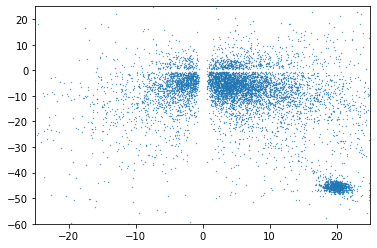

In [196]:
#for Pleiades
print("Total data: " +str(len(data_1)))
print("Reduced data: " +str(len(data)))
print("Reduced percentage: " +str(len(data)*100/(len(data_1))) +"%")

data = data.loc[data['pmra']<100]
data = data.loc[data['pmra']>-100]

data = data.loc[data['pmdec']<100]
data = data.loc[data['pmdec']>-100]

print("Total data: " +str(len(data_1)))
print("Reduced data: " +str(len(data)))
print("Reduced percentage: " +str(len(data)*100/(len(data_1))) +"%")

plt.scatter(data.pmra, data.pmdec, s = 0.1)
plt.xlim(-25,25)
plt.ylim(-60,25)

In [191]:
#save as CSV
d = pd.DataFrame(data)
d.to_csv('/home/and/Data_science/Tesis/CSVs/Pleaides_filtered.csv', index=False, header= True)

Total data: 131699
Reduced data: 7070
Reduced percentage: 5.368301961290519%
Total data: 131699
Reduced data: 7070
Reduced percentage: 5.368301961290519%


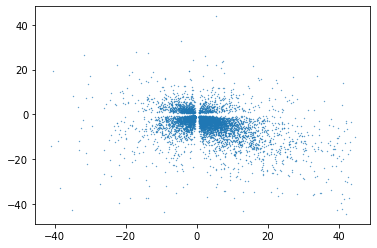

In [156]:
#for Perseus
print("Total data: " +str(len(data_1)))
print("Reduced data: " +str(len(data)))
print("Reduced percentage: " +str(len(data)*100/(len(data_1))) +"%")

data = data.loc[data['pmra']<45]
data = data.loc[data['pmra']>-45]

data = data.loc[data['pmdec']<45]
data = data.loc[data['pmdec']>-45]

print("Total data: " +str(len(data_1)))
print("Reduced data: " +str(len(data)))
print("Reduced percentage: " +str(len(data)*100/(len(data_1))) +"%")

plt.scatter(data.pmra, data.pmdec, s = 0.1)

In [155]:
#save as CSV
d = pd.DataFrame(data)
d.to_csv('/home/and/Data_science/Tesis/CSVs/Perseus_filtered.csv', index=False, header= True)

Total data: 2841915
Reduced data: 312700
Reduced percentage: 11.003144006770082%
Total data: 2841915
Reduced data: 312700
Reduced percentage: 11.003144006770082%


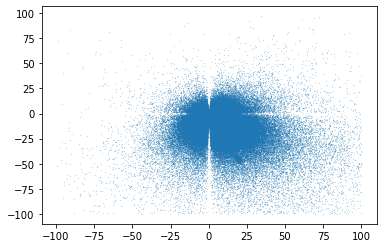

In [138]:
#for Hyades
print("Total data: " +str(len(data_1)))
print("Reduced data: " +str(len(data)))
print("Reduced percentage: " +str(len(data)*100/(len(data_1))) +"%")

data = data.loc[data['pmra']<100]
data = data.loc[data['pmra']>-100]

data = data.loc[data['pmdec']<100]
data = data.loc[data['pmdec']>-100]

print("Total data: " +str(len(data_1)))
print("Reduced data: " +str(len(data)))
print("Reduced percentage: " +str(len(data)*100/(len(data_1))) +"%")

plt.scatter(data.pmra, data.pmdec, s = 0.01)

In [139]:
#save as CSV
d = pd.DataFrame(data)
d.to_csv('/home/and/Data_science/Tesis/CSVs/Hyades_filtered.csv', index=False, header= True)

Total data: 2306468
Reduced data: 155244
Reduced percentage: 6.730810919553187%
Total data: 2306468
Reduced data: 155244
Reduced percentage: 6.730810919553187%


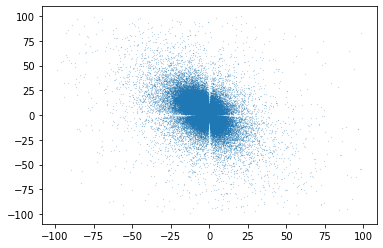

In [102]:
#for NGC2451
print("Total data: " +str(len(data_1)))
print("Reduced data: " +str(len(data)))
print("Reduced percentage: " +str(len(data)*100/(len(data_1))) +"%")

data = data.loc[data['pmra']<100]
data = data.loc[data['pmra']>-100]

data = data.loc[data['pmdec']<100]
data = data.loc[data['pmdec']>-100]

print("Total data: " +str(len(data_1)))
print("Reduced data: " +str(len(data)))
print("Reduced percentage: " +str(len(data)*100/(len(data_1))) +"%")

plt.scatter(data.pmra, data.pmdec, s = 0.01)

In [ ]:
#save as CSV
d = pd.DataFrame(data)
d.to_csv('/home/and/Data_science/Tesis/CSVs/NGC2451_filtered.csv', index=False, header= True)

Total data: 353573
Reduced data: 72981
Reduced percentage: 20.640999171316814%
Total data: 353573
Reduced data: 72981
Reduced percentage: 20.640999171316814%


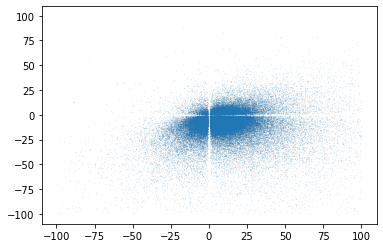

In [81]:
#for blanco 1
print("Total data: " +str(len(data_1)))
print("Reduced data: " +str(len(data)))
print("Reduced percentage: " +str(len(data)*100/(len(data_1))) +"%")

data = data.loc[data['pmra']<100]
data = data.loc[data['pmra']>-100]

data = data.loc[data['pmdec']<100]
data = data.loc[data['pmdec']>-100]

print("Total data: " +str(len(data_1)))
print("Reduced data: " +str(len(data)))
print("Reduced percentage: " +str(len(data)*100/(len(data_1))) +"%")

plt.scatter(data.pmra, data.pmdec, s = 0.001)

In [103]:
#save as CSV
d = pd.DataFrame(data)
d.to_csv('/home/and/Data_science/Tesis/CSVs/Blanco1_filtered.csv', index=False, header= True)